In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
df=pd.read_csv("BIg_mart_sales_prediction.csv")

In [3]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# PREPROCESSING.

# Finding null values

In [6]:
df.isnull().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [7]:
#Item weight and outlet size has null values which need to be filled.

In [8]:
df["Item_Weight"]=df["Item_Weight"].fillna(df['Item_Weight'].mean())

In [9]:
outlet_size_mode=df.pivot_table(values="Outlet_Size",columns="Outlet_Type",aggfunc=(lambda x:x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [10]:
miss_bool=df['Outlet_Size'].isnull()
df.loc[miss_bool,"Outlet_Size"]=df.loc[miss_bool,"Outlet_Type"].apply(lambda x:outlet_size_mode[x])

In [11]:
df.isnull().sum()/len(df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

# Checking columns for right datatype.

In [12]:
cat_cols=df.select_dtypes(include="O")
cat_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Small,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [13]:
for i in cat_cols:
    print(i)
    print(df[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [14]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [15]:
def ID(i):
    if "FD" in i:
        i1=i[0:2]
        return(str(i1))
    elif "DR" in i:
        i2=i[0:2]
        return(str(i2))
    elif "NC" in i:
        i3=i[0:2]
        return(str(i3))

In [16]:
df["Item_Type_Combined"]=df["Item_Identifier"].map(ID)

In [17]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [18]:
def IFC(i):
    if "LF" in i:
        return "Low Fat"
    elif "low fat" in i:
        return "Low Fat"
    elif "reg" in i:
        return "Regular"
    else:
        return i

In [19]:
df["Item_Fat_Content"]=df["Item_Fat_Content"].map(IFC)

In [20]:
df["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [21]:
cat_cols1=df.select_dtypes(include='O')

In [22]:
for i in cat_cols1:
    print(i)
    print(df[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Type_Combined
['FD' 'DR' 'NC']


In [23]:
# I HAVE CREATED NEW COLUMN OF ITEM TYPE WHERE FD= FOOD , DR=DRINKS , NC= NON CONSUMABLE .NOW I DONT REQUIRE COLUMNS Item_Identifier AND Item_Type.


In [24]:
df.drop(["Item_Identifier"],axis=1,inplace=True)

In [25]:
df.drop(["Outlet_Identifier"],axis=1,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

In [27]:
num_cols=df.select_dtypes(include=["int","float"])

In [28]:
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [30]:
# ZERO item visibility is not possible so replacing it with mean value.

In [31]:
df.loc[:,"Item_Visibility"].replace([0],[df["Item_Visibility"].mean()],inplace=True)

In [32]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR


In [33]:
#OUTLET YEARS WHILE MODEL BUILDING WILL GIVE ERROR BECAUSE OF BIG VALUES , I HAVE SUBTRACTED THOSE YEARS FROM 2013 BECAUSE MY DATA WAS EXTRACTED IN 2013.

In [34]:
df["Outlet_years"]=2013-df["Outlet_Establishment_Year"]

In [35]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.930,Low Fat,0.066132,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834,FD,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Small,Tier 2,Supermarket Type1,549.2850,FD,11
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136,NC,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976,FD,4


# EDA

# Univariate analysis of numercial columns.

In [36]:
num_cols1=df.select_dtypes(include=["int","float"])
num_cols1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Outlet_years'],
      dtype='object')

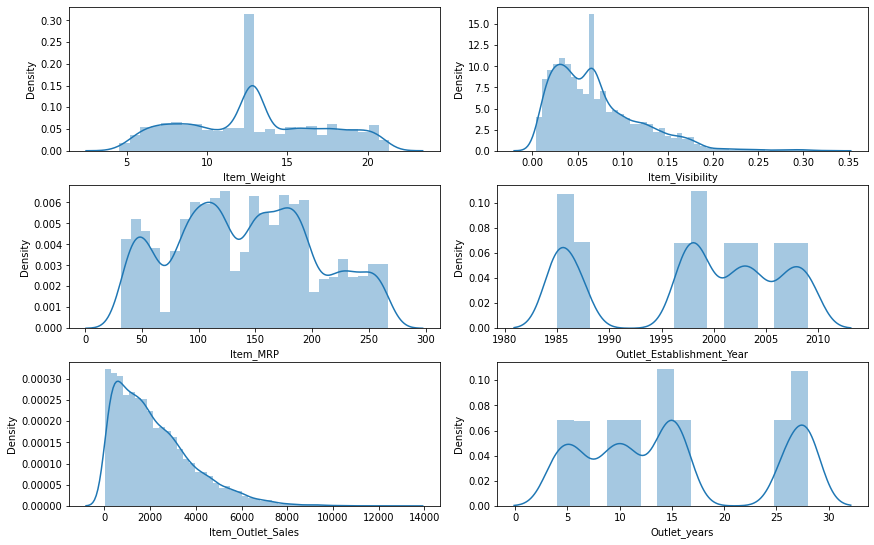

In [37]:
plt.figure(figsize=(12,12))
count=1
for i in num_cols1:
    plt.subplot(5,2,count)
    sns.distplot(df[i])
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [38]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_years
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.070213,140.992782,1997.831867,2181.288914,15.168133
std,4.226124,0.048742,62.275067,8.371760,1706.499616,8.371760
min,4.555000,0.003575,31.290000,1985.000000,33.290000,4.000000
25%,9.310000,0.033085,93.826500,1987.000000,834.247400,9.000000
50%,12.857645,0.062517,143.012800,1999.000000,1794.331000,14.000000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [39]:
#ANALYSIS:- 1)Item weight is normallyb distributed.
#           2)Item_Visibility is also normally distributed.
#           3)Item MRP is normally distribute
#           4)Item outlet sales is right skeweed (mean>median)


# HANDLING SKEWNEES

In [40]:
df["Item_Outlet_Sales"]=np.log(1+df["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

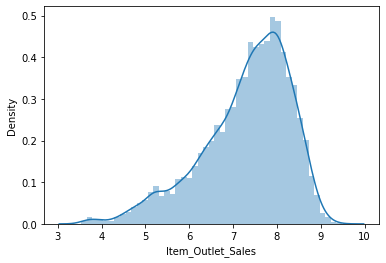

In [41]:
sns.distplot(df["Item_Outlet_Sales"])

# UNIVARIATE ANALYSIS OF CATEGORICAL COLUMNS.

In [42]:
cat_cols2=df.select_dtypes(include=["O"])
cat_cols2.columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Type_Combined'],
      dtype='object')

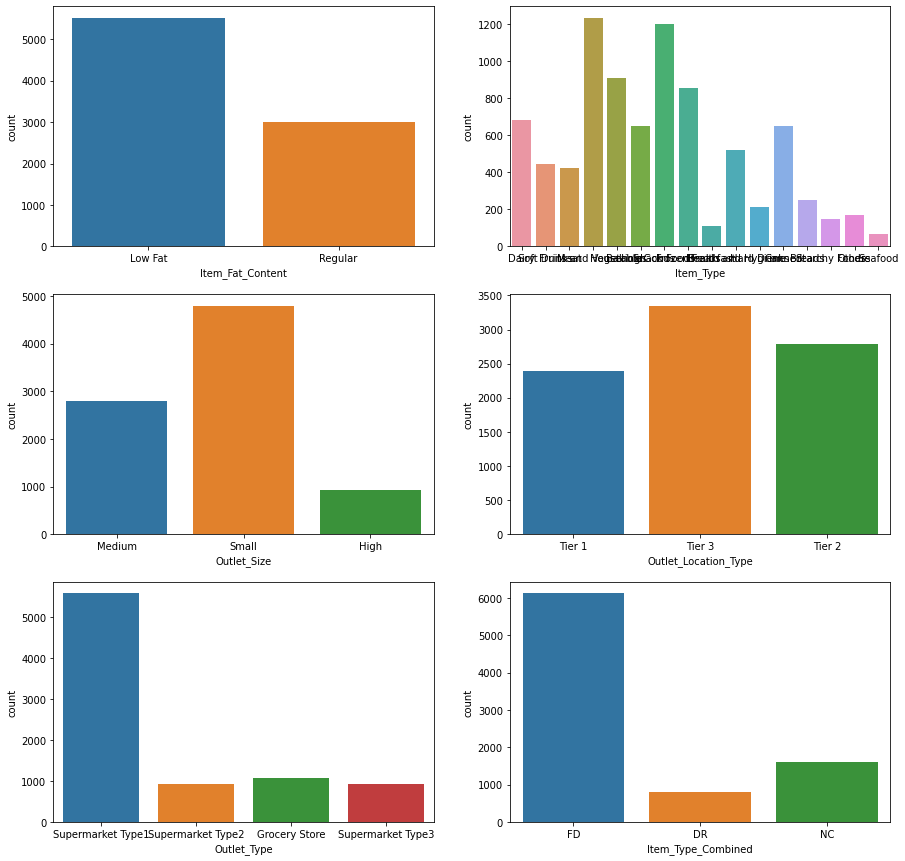

In [43]:
plt.figure(figsize=(15,15))
count=1
for i in cat_cols2:
    plt.subplot(3,2,count)
    sns.countplot(df[i])
    count+=1
plt.show()

In [44]:
#ANALYSIS:- 1)low fat products are more than regular 
#           2) In outlet size Small sized outlets are highest and larg sized shops are very less.
#           3)Outlet number are almost eqiual is Tier 1 and Tier 2 cities, highest is tier 3 cities.
#           4)There are 4 types of outlets, Super market type1 has highest count.
#           5)Out of all types of itom selled, Food products has highest count.

# BIVARIATE ANALYSIS OF NUMERICAL COLUMNS WITH TARGET VAIRABLE.

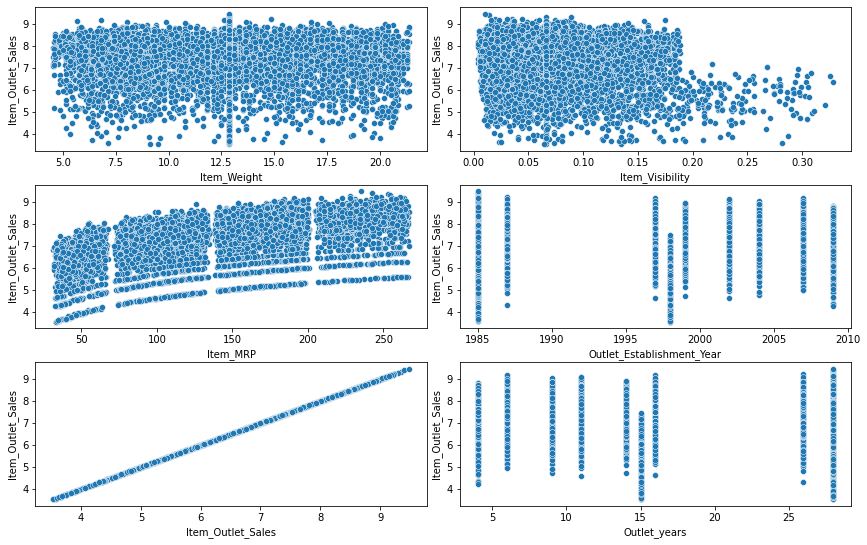

In [45]:
plt.figure(figsize=(12,12))
count=1
for i in num_cols1:
    plt.subplot(5,2,count)
    sns.scatterplot(x=i,y="Item_Outlet_Sales",data=df)
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [46]:
#There is positive corelation between Item MRP and Item outlet sales.

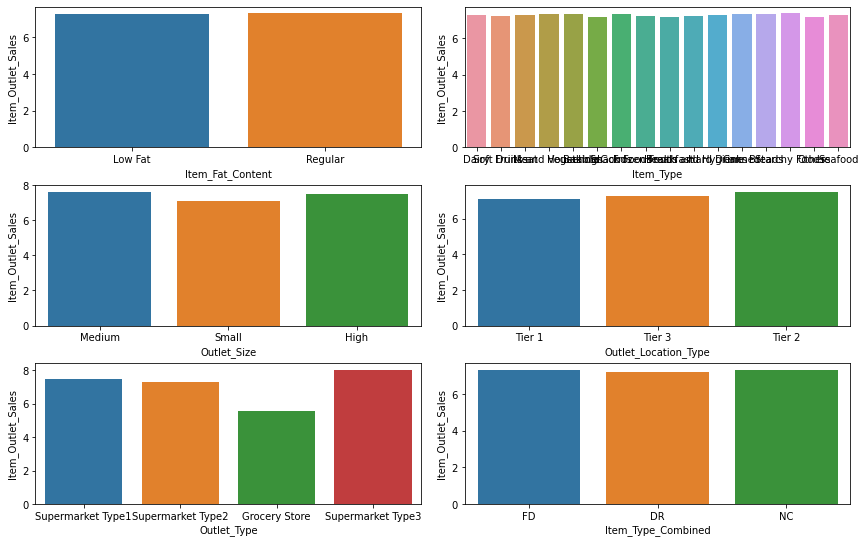

In [47]:
plt.figure(figsize=(12,12))
count=1
for i in cat_cols2:
    plt.subplot(5,2,count)
    sns.barplot(x=i,y="Item_Outlet_Sales",data=df,ci=False)
    count+=1
plt.tight_layout(pad=0.5,w_pad=0.5,h_pad=0.2)

In [48]:
#Supermarket type 3 of outlet type has very high item outlet sales and least if from grocery store.
#Tier 2 and Tier 3 cities hsa almost equal contribution in sales.


# MANUAL ORDINAL ENCODING

In [49]:
for i in cat_cols2:
    print(i)
    print(df[i].unique())

Item_Fat_Content
['Low Fat' 'Regular']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Size
['Medium' 'Small' 'High']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
Item_Type_Combined
['FD' 'DR' 'NC']


In [50]:
def fat(i):
    if 'Low Fat' in i:
        return (0)
    else:
        return(1)

In [51]:
df['Item_Fat_Content']=df['Item_Fat_Content'].map(fat)

In [52]:
df['Item_Fat_Content']=df["Item_Fat_Content"].astype(float)

In [53]:
def OLT(i):
    if "Tier 1" in i:
        return (2)
    elif 'Tier 2' in i:
        return (1)
    elif 'Tier 3' in i:
        return (0)

In [54]:
df['Outlet_Location_Type']=df['Outlet_Location_Type'].map(OLT)

In [55]:
df['Outlet_Location_Type']=df["Outlet_Location_Type"].astype(float)

In [56]:
def OT(i):
    if "Grocery Store" in i:
        return (0)
    elif 'Supermarket Type1' in i:
        return (1)
    elif 'Supermarket Type2' in i:
        return (2)
    elif "Supermarket Type3" in i:
        return (3)

In [57]:
df['Outlet_Type']=df["Outlet_Type"].map(OT)

In [58]:
df['Outlet_Type']=df['Outlet_Type'].astype("float")

In [59]:
def OS(i):
    if 'Small' in i:
        return(0)
    elif 'Medium' in i:
        return(1)
    else:
        return(2)

In [60]:
df['Outlet_Size']=df["Outlet_Size"].map(OS)

In [61]:
df['Outlet_Size']=df['Outlet_Size'].astype("float")

In [62]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years
0,9.30,0.0,0.016047,Dairy,249.8092,1999,1.0,2.0,1.0,8.225808,FD,14
1,5.92,1.0,0.019278,Soft Drinks,48.2692,2009,1.0,0.0,2.0,6.096776,DR,4


In [63]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False,drop="first")

In [263]:
ohe.fit_transform(df[["Item_Type","Item_Type_Combined"]])

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [264]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_years
0,9.30,0.0,0.016047,Dairy,249.8092,1999,1.0,2.0,1.0,8.225808,FD,14
1,5.92,1.0,0.019278,Soft Drinks,48.2692,2009,1.0,0.0,2.0,6.096776,DR,4


# Encoding should be done after train_test_split.

In [703]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=25)

In [315]:
df["Outlet_sales"]=df["Item_Outlet_Sales"]

In [316]:
df.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

In [317]:
df.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_years,Item_Type_Combined_DR,...,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_sales
0,9.30,0.0,0.016047,249.8092,1999,1.0,2.0,1.0,14,0,...,0,0,0,0,0,0,0,0,0,8.225808
1,5.92,1.0,0.019278,48.2692,2009,1.0,0.0,2.0,4,1,...,0,0,0,0,0,0,0,1,0,6.096776


In [318]:
df.drop(["Outlet_Establishment_Year"],axis=1,inplace=True)

<AxesSubplot:>

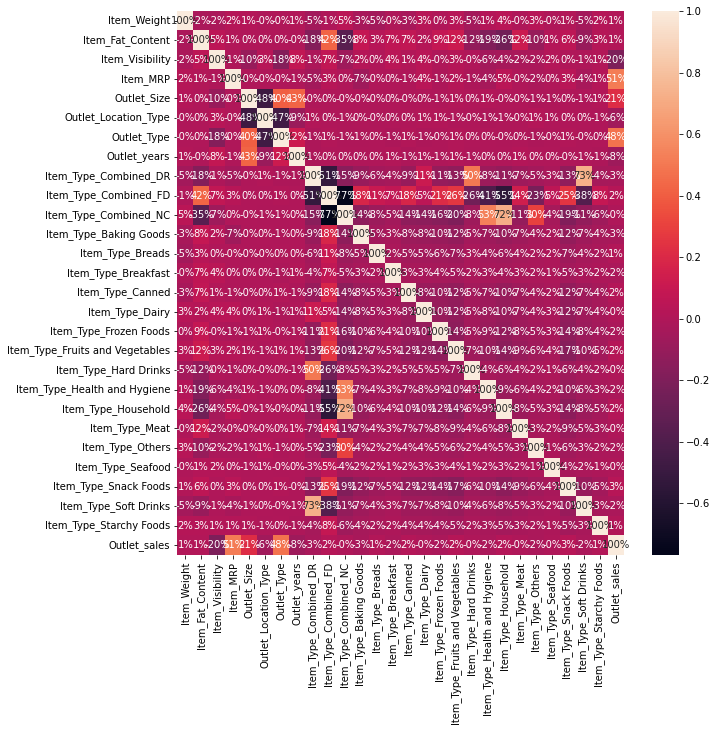

In [319]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".0%")

In [320]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=25)

In [325]:
from sklearn.linear_model import LinearRegression

In [326]:
le=LinearRegression()

In [327]:
le.fit(X_train,Y_train)

LinearRegression()

In [328]:
Y_pred_train=le.predict(X_train)
Y_pred_test=le.predict(X_test)

In [329]:
from sklearn.metrics import mean_squared_error,r2_score
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_train,Y_pred_train)),2))
print("R2 Score:",round(r2_score(Y_train,Y_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_pred_test)),2))
print("R2 Score:",round(r2_score(Y_test,Y_pred_test),2))

Train Data
RMSE: 0.65
R2 Score: 0.57
Test Data
RMSE: 0.68
R2 Score: 0.57


In [331]:
r2=0.57
n=X_train.shape[0]
p=X_train.shape[1]
adr2=1-(1-r2)*(n-1)/(n-p-1)
adr2

0.568044796227686

In [350]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=4)
X_poly_train=poly_features.fit_transform(X_train)
X_poly_test=poly_features.fit_transform(X_test)
le.fit(X_poly_train,Y_train)
Y_poly_pred_train=le.predict(X_poly_train)
Y_poly_pred_test=le.predict(X_poly_test)

In [333]:
print("Train Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_train,Y_poly_pred_train)),2))
print("R2 Score:",round(r2_score(Y_train,Y_poly_pred_train),2))
print("Test Data")
print("RMSE:",round(np.sqrt(mean_squared_error(Y_test,Y_poly_pred_test)),2))
print("R2 Score:",round(r2_score(Y_test,Y_poly_pred_test),2))

Train Data
RMSE: 0.48
R2 Score: 0.77
Test Data
RMSE: 0.59
R2 Score: 0.68


In [334]:
def metrics(Y_actual,Y_pred):
    r2=r2_score(Y_actual,Y_pred)
    RMSE=np.sqrt(mean_squared_error(Y_actual,Y_pred))
    print("R2 Score: {}|RMSE:{}".format(round(r2,2),round(RMSE,2)))

In [335]:
from sklearn.linear_model import Ridge,Lasso

In [336]:
l2=Lasso(5)
l2.fit(X_train,Y_train)

Lasso(alpha=5)

In [337]:
y_pred_train1=l2.predict(X_train)
y_pred_test1=l2.predict(X_test)

In [338]:
print("Training performance")
metrics(Y_train,y_pred_train1)
print("Testing performnance")
metrics(Y_test,y_pred_test1)

Training performance
R2 Score: 0.25|RMSE:0.87
Testing performnance
R2 Score: 0.25|RMSE:0.91


In [342]:
l1=Ridge(1)
l1.fit(X_train,Y_train)

Ridge(alpha=1)

In [343]:
y_pred_train2=l1.predict(X_train)
y_pred_test2=l1.predict(X_test)

In [344]:
print("Training performance")
metrics(Y_train,y_pred_train2)
print("Testing performnance")
metrics(Y_test,y_pred_test2)

Training performance
R2 Score: 0.57|RMSE:0.65
Testing performnance
R2 Score: 0.57|RMSE:0.68
